In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from catboost import CatBoostRegressor

In [2]:
flight_df = pd.read_excel(r"C:\Users\sandi\Downloads\Flight_Price_Train.xlsx")

# Question 1:

# Perform Feature Engineering 

In [3]:
# displaying top 5 records
display(flight_df.head(5))

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# showing shape of the data
print(f"Shape of train data is {flight_df.shape}")

Shape of train data is (10683, 11)


In [5]:
# Statistical info for numeric column
flight_df.describe().T
# 75th percentile in price is 12373 and max is 79512 that means data has some outliers

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
# Checking descriptive statistics for categorical columns
flight_df.describe(include = 'object')
# In Airline, Jet Airways flights have more frequency
# most of the flights are boarded from Delhi and destination is Cochin

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [7]:
flight_df.duplicated().sum()

220

In [8]:
# removing duplicate records
flight_df.drop_duplicates(inplace=True)

In [9]:
#Column wise Null values 
flight_df.isnull().sum()[flight_df.isnull().sum()>0]

# route and Total_stops have 1 null values

Route          1
Total_Stops    1
dtype: int64

In [10]:
# removing nulls
flight_df.dropna(inplace=True)

In [11]:
# after removing nulls and duplicate
print(f"After removing nulls and duplicate shape of the dataframe is {flight_df.shape}")

After removing nulls and duplicate shape of the dataframe is (10462, 11)


## b) Extract Date, Month, Year from Date of Journey

In [12]:
# Checking datatype of Date_of_Journey
flight_df.Date_of_Journey.dtype
# datatype is object 


dtype('O')

In [13]:
# converting datatype of Date_of_Journey to datatime format
flight_df.Date_of_Journey = pd.to_datetime(flight_df.Date_of_Journey, errors='coerce', format='%d/%m/%Y')

In [14]:
flight_df.Date_of_Journey
# Datatype is now datetime

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date_of_Journey, Length: 10462, dtype: datetime64[ns]

In [15]:
# checking nulls after datetime conversion
flight_df.isnull().sum()[flight_df.isnull().sum()>0]

Series([], dtype: int64)

In [16]:
flight_df['Journey_Date_Day'] = flight_df.Date_of_Journey.dt.day

In [17]:
flight_df['Journey_Date_Month'] = flight_df.Date_of_Journey.dt.month

In [18]:
flight_df['Journey_Date_Year'] = flight_df.Date_of_Journey.dt.year

# Question 2:

# Perform Exploratory Data Analysis (EDA) tasks

# a) Which airline is most preferred airline

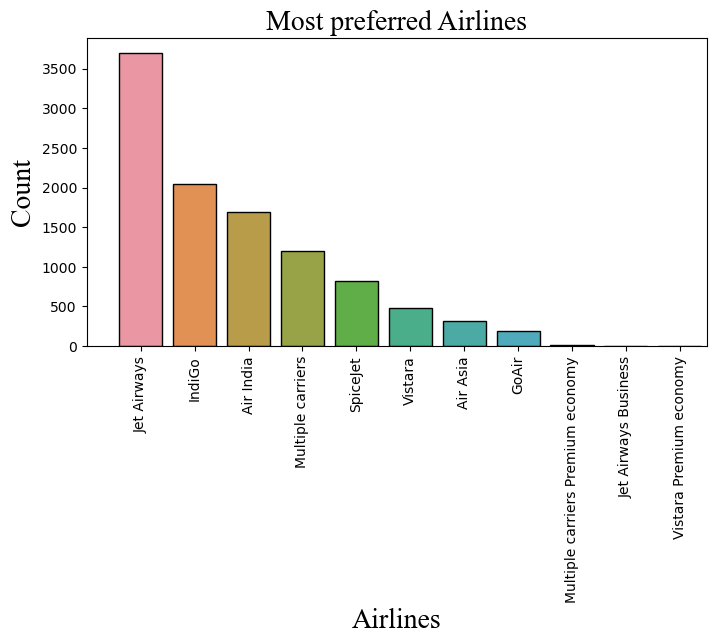

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x="Airline", data=flight_df,order = flight_df['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

# Most preferred Airline is “Jet Airways”

# c) Find the majority of the flights take off from which source


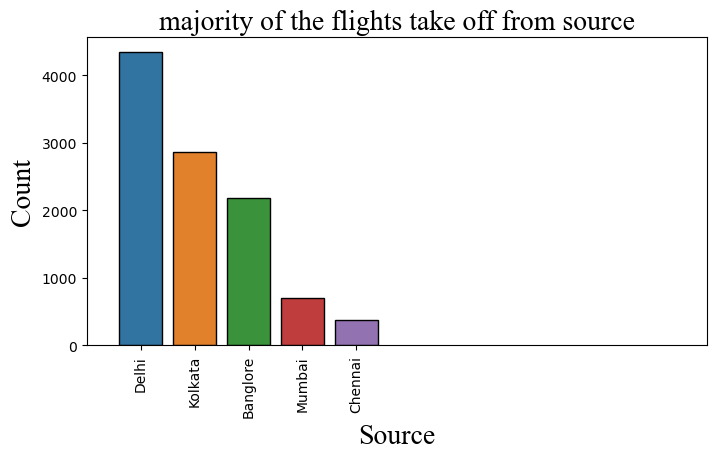

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x="Source", data=flight_df,order = flight_df['Source'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("majority of the flights take off from source",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Source",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

## majority of the flights take off from Delhi

# d) Find maximum flights land in which destination

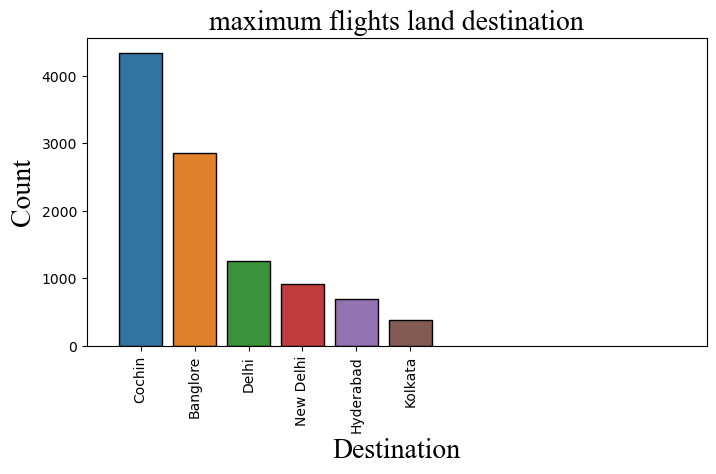

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x="Destination", data=flight_df,order = flight_df['Destination'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("maximum flights land destination",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Destination",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

## maximum flights land destination: cochin

# Question 3:

# Compare independent features with Target feature to check the impact on price


# a) Which airline has the highest price

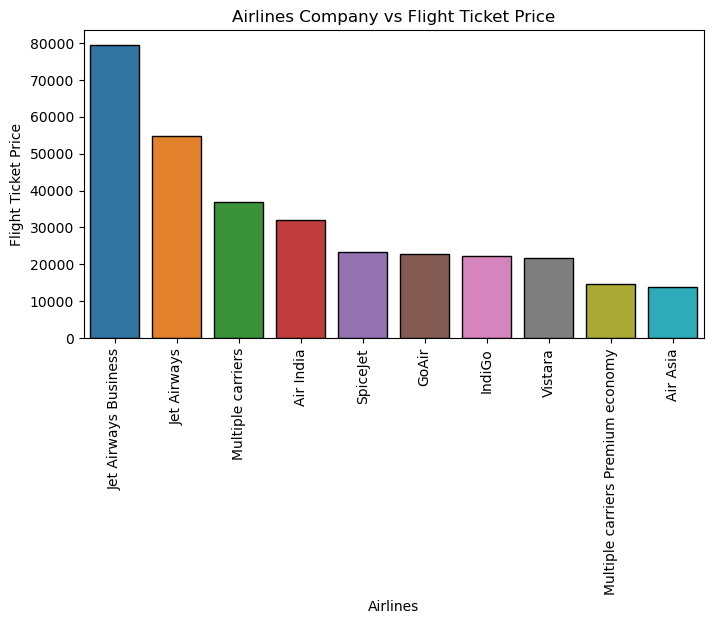

In [22]:
airlines = flight_df.groupby('Airline').Price.max()
airlines_df = airlines.to_frame().sort_values('Price', ascending=False)[0:10]

plt.subplots(figsize=(8, 4))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"], ec="black")
plt.title("Airlines Company vs Flight Ticket Price")
plt.ylabel("Flight Ticket Price")
plt.xlabel("Airlines")
plt.xticks(rotation=90)
plt.show()

## “Jet Airways Business” tickets are the most expensive ones.

# b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k

In [23]:
df_business_class = flight_df[flight_df.Additional_Info == 'Business class']
print(f"Price of All flights are ranging from {flight_df.Price.min()} rupees to {flight_df.Price.max()} rupees")
print(f"Price of Business class flights are ranging from {df_business_class.Price.min()} rupees to {df_business_class.Price.max()} rupees")
print("-"*125)
print(f"Average price for All flights is {flight_df.Price.mean():.0f} rupees ")
print(f"Average price for Business class flights is {df_business_class.Price.mean():.0f} rupees ")
print("-"*125)
print("Price of Business class  is on higher side")
print("-"*125)
print("Business class flight which have price higher than 50K:")
display(df_business_class[df_business_class.Price > 50000])

Price of All flights are ranging from 1759 rupees to 79512 rupees
Price of Business class flights are ranging from 28097 rupees to 79512 rupees
-----------------------------------------------------------------------------------------------------------------------------
Average price for All flights is 9027 rupees 
Average price for Business class flights is 56811 rupees 
-----------------------------------------------------------------------------------------------------------------------------
Price of Business class  is on higher side
-----------------------------------------------------------------------------------------------------------------------------
Business class flight which have price higher than 50K:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date_Day,Journey_Date_Month,Journey_Date_Year
2924,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,1,3,2019
5372,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,1,3,2019
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,1,3,2019


# Question 4:

# perform encoding for the required features according to the data

In [24]:
#Convertig Dep_Time & Arrival_Time to datetime format
flight_df.Dep_Time = pd.to_datetime(flight_df.Dep_Time)
flight_df.Arrival_Time = pd.to_datetime(flight_df.Arrival_Time)

In [25]:
flight_df['Dep_Hour'] = flight_df.Dep_Time.dt.hour
flight_df['Dep_Minutes'] = flight_df.Dep_Time.dt.minute

In [26]:
flight_df['Arrival_Hour'] = flight_df.Arrival_Time.dt.hour
flight_df['Arrival_Minutes'] = flight_df.Arrival_Time.dt.minute

In [27]:
dur = []
for rec in flight_df.Duration:
    if len(rec.split()) != 2:
        if 'h' in rec:
            dur.append(rec.strip()+' 0m')
        else:
            dur.append('0h '+rec.strip())
    else:
        dur.append(rec.strip())
Duration_hours = []
Duration_mins = []
for i in dur:
    Duration_hours.append(int(i.split('h')[0]))
    Duration_mins.append(int(i.split('m')[0].split()[1]))

In [28]:
flight_df['Duration_hours'] = Duration_hours
flight_df['Duration_mins'] = Duration_mins

In [29]:
# as we have extracted all the required information datetime data so we can drop these columns
flight_df = flight_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], axis = 1)

In [30]:
flight_df.Additional_Info.value_counts()
# most of the records has no_info

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
flight_df.Route.value_counts()
# not that informative as Total_Stops, Source, Destination  can compensate this column

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [32]:
# Dropping the non informative columns
flight_df = flight_df.drop(['Route','Additional_Info'], axis = 1)

In [33]:
# checking columns datatype
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10462 non-null  object
 1   Source              10462 non-null  object
 2   Destination         10462 non-null  object
 3   Total_Stops         10462 non-null  object
 4   Price               10462 non-null  int64 
 5   Journey_Date_Day    10462 non-null  int64 
 6   Journey_Date_Month  10462 non-null  int64 
 7   Journey_Date_Year   10462 non-null  int64 
 8   Dep_Hour            10462 non-null  int64 
 9   Dep_Minutes         10462 non-null  int64 
 10  Arrival_Hour        10462 non-null  int64 
 11  Arrival_Minutes     10462 non-null  int64 
 12  Duration_hours      10462 non-null  int64 
 13  Duration_mins       10462 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 1.2+ MB


In [34]:
# Label Encoding Object columns

le_Airline = LabelEncoder().fit(flight_df.Airline)
le_Source = LabelEncoder().fit(flight_df.Source)
le_Destination = LabelEncoder().fit(flight_df.Destination)

In [35]:
# converting Total_Stops to numeric manually
flight_df.Total_Stops.replace({'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'non-stop':0}, inplace = True)

In [36]:
flight_df.Airline = le_Airline.transform(flight_df.Airline)
flight_df.Source = le_Source.transform(flight_df.Source)
flight_df.Destination = le_Destination.transform(flight_df.Destination)

In [37]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Airline             10462 non-null  int32
 1   Source              10462 non-null  int32
 2   Destination         10462 non-null  int32
 3   Total_Stops         10462 non-null  int64
 4   Price               10462 non-null  int64
 5   Journey_Date_Day    10462 non-null  int64
 6   Journey_Date_Month  10462 non-null  int64
 7   Journey_Date_Year   10462 non-null  int64
 8   Dep_Hour            10462 non-null  int64
 9   Dep_Minutes         10462 non-null  int64
 10  Arrival_Hour        10462 non-null  int64
 11  Arrival_Minutes     10462 non-null  int64
 12  Duration_hours      10462 non-null  int64
 13  Duration_mins       10462 non-null  int64
dtypes: int32(3), int64(11)
memory usage: 1.1 MB


# Q5 Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model.

# Q6 Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement.

# Spliting data into train and test

In [38]:
# Scaling the Price into thousands
flight_df.Price = flight_df.Price/1000

In [39]:
flight_df.rename(columns={'Price':'Price_in_thousands'}, inplace=True)

In [40]:
# Spliting the data into train test(validation)

train, test = train_test_split(flight_df, test_size=0.2, random_state=999)

In [41]:
X_train = train.drop('Price_in_thousands', axis = 1)
y_train = train.Price_in_thousands

In [42]:
X_test = test.drop('Price_in_thousands', axis = 1)
y_test = test.Price_in_thousands

In [43]:
eval_df = pd.DataFrame()
from sklearn.metrics import *
def check_model(model,comm ='base model', imp_feat = False):
    global eval_df, pred_train, pred_test
    if imp_feat == True:
        xtr, ytr = X_train1, y_train1
        xts, yts = X_test1, y_test1
        comm = 'with feature selection'
    else:
        xtr, ytr = X_train, y_train
        xts, yts = X_test, y_test
        
    #model training and prediction
    model.fit(xtr, ytr)
    pred_train = model.predict(xtr)
    pred_test = model.predict(xts)
    # evaluation matrics
    train_score = model.score(xtr, ytr)
    test_score = model.score(xts, yts)
    N = xtr.shape[0]
    K = xtr.shape[1]
    Adj_R2 = 1 - ((1-train_score)*(N-1)/(N-K-1))
    
    mse_train = mean_squared_error(ytr, pred_train)
    rmse_train = np.sqrt(mse_train)
    mape_train = mean_absolute_percentage_error(ytr, pred_train)
    
    mse_test = mean_squared_error(yts, pred_test)
    rmse_test = np.sqrt(mse_test)
    mape_test = mean_absolute_percentage_error(yts, pred_test)
    # evaluation storing
    if str(model).find('CatBoostRegressor') != -1:
        model_name = 'CatBoost'
    else:
        model_name = str(model).split('Reg')[0].split('(')[0]
    temp = pd.DataFrame({'Model':model_name,'Comment': comm,
                         'R2_train':train_score,'Adj_R2':Adj_R2, 'R2_test':test_score,
                         'mse_train':mse_train,       'mse_test':mse_test,
                         'rmse_train':rmse_train,     'rmse_test':rmse_test,
                         'mape_train':mape_train,     'mape_test':mape_test,}, index = [1])
    eval_df = pd.concat([temp,eval_df]).reset_index(drop = True)
    return eval_df.style.highlight_max(subset=['R2_train','R2_test'])\
            .highlight_min(subset=['mse_train','mse_test','rmse_train','rmse_test','mape_train','mape_test'])

In [44]:
lr = LinearRegression()
check_model(lr)

,Model,Comment,R2_train,Adj_R2,R2_test,mse_train,mse_test,rmse_train,rmse_test,mape_train,mape_test
0,Linear,base model,0.433549,0.432668,0.441720,12.132753,11.866754,3.483210,3.444816,0.314366,0.317849


In [45]:
dt = DecisionTreeRegressor()
check_model(dt)

,Model,Comment,R2_train,Adj_R2,R2_test,mse_train,mse_test,rmse_train,rmse_test,mape_train,mape_test
0,DecisionTree,base model,0.971552,0.971508,0.714051,0.609324,6.078109,0.780592,2.465382,0.032752,0.158555
1,Linear,base model,0.433549,0.432668,0.441720,12.132753,11.866754,3.483210,3.444816,0.314366,0.317849


In [46]:
dt1 = DecisionTreeRegressor(max_depth=5, min_samples_split=30)
comment = str(dt1).split('(')[1].split(')')[0]
check_model(dt1, comment)
# max_depth=5, min_samples_split=30

,Model,Comment,R2_train,Adj_R2,R2_test,mse_train,mse_test,rmse_train,rmse_test,mape_train,mape_test
0,DecisionTree,"max_depth=5, min_samples_split=30",0.668966,0.668450,0.680416,7.090392,6.793046,2.662779,2.606347,0.212206,0.213647
1,DecisionTree,base model,0.971552,0.971508,0.714051,0.609324,6.078109,0.780592,2.465382,0.032752,0.158555
2,Linear,base model,0.433549,0.432668,0.441720,12.132753,11.866754,3.483210,3.444816,0.314366,0.317849


In [47]:
rf = RandomForestRegressor()
check_model(rf)

,Model,Comment,R2_train,Adj_R2,R2_test,mse_train,mse_test,rmse_train,rmse_test,mape_train,mape_test
0,RandomForest,base model,0.954507,0.954436,0.803164,0.974415,4.183936,0.987125,2.045467,0.062104,0.139584
1,DecisionTree,"max_depth=5, min_samples_split=30",0.668966,0.668450,0.680416,7.090392,6.793046,2.662779,2.606347,0.212206,0.213647
2,DecisionTree,base model,0.971552,0.971508,0.714051,0.609324,6.078109,0.780592,2.465382,0.032752,0.158555
3,Linear,base model,0.433549,0.432668,0.441720,12.132753,11.866754,3.483210,3.444816,0.314366,0.317849


In [48]:
rf1 = RandomForestRegressor(min_samples_split=65)
comment = str(rf1).split('(')[1].split(')')[0]
check_model(rf1, comment)
# min_samples_split=65

,Model,Comment,R2_train,Adj_R2,R2_test,mse_train,mse_test,rmse_train,rmse_test,mape_train,mape_test
0,RandomForest,min_samples_split=65,0.804983,0.804680,0.797524,4.177039,4.303804,2.043780,2.074561,0.145110,0.155746
1,RandomForest,base model,0.954507,0.954436,0.803164,0.974415,4.183936,0.987125,2.045467,0.062104,0.139584
2,DecisionTree,"max_depth=5, min_samples_split=30",0.668966,0.668450,0.680416,7.090392,6.793046,2.662779,2.606347,0.212206,0.213647
3,DecisionTree,base model,0.971552,0.971508,0.714051,0.609324,6.078109,0.780592,2.465382,0.032752,0.158555
4,Linear,base model,0.433549,0.432668,0.441720,12.132753,11.866754,3.483210,3.444816,0.314366,0.317849


In [49]:
gb = GradientBoostingRegressor(learning_rate=0.15)
comment = str(gb).split('(')[1].split(')')[0]
check_model(gb, comment)

,Model,Comment,R2_train,Adj_R2,R2_test,mse_train,mse_test,rmse_train,rmse_test,mape_train,mape_test
0,GradientBoosting,learning_rate=0.15,0.802840,0.802534,0.792801,4.222941,4.404203,2.054980,2.098619,0.166296,0.171561
1,RandomForest,min_samples_split=65,0.804983,0.804680,0.797524,4.177039,4.303804,2.043780,2.074561,0.145110,0.155746
2,RandomForest,base model,0.954507,0.954436,0.803164,0.974415,4.183936,0.987125,2.045467,0.062104,0.139584
3,DecisionTree,"max_depth=5, min_samples_split=30",0.668966,0.668450,0.680416,7.090392,6.793046,2.662779,2.606347,0.212206,0.213647
4,DecisionTree,base model,0.971552,0.971508,0.714051,0.609324,6.078109,0.780592,2.465382,0.032752,0.158555
5,Linear,base model,0.433549,0.432668,0.441720,12.132753,11.866754,3.483210,3.444816,0.314366,0.317849


In [50]:
ada = AdaBoostRegressor()
check_model(ada)

,Model,Comment,R2_train,Adj_R2,R2_test,mse_train,mse_test,rmse_train,rmse_test,mape_train,mape_test
0,AdaBoost,base model,0.299008,0.297918,0.279020,15.014468,15.325069,3.874851,3.914725,0.564110,0.573108
1,GradientBoosting,learning_rate=0.15,0.802840,0.802534,0.792801,4.222941,4.404203,2.054980,2.098619,0.166296,0.171561
2,RandomForest,min_samples_split=65,0.804983,0.804680,0.797524,4.177039,4.303804,2.043780,2.074561,0.145110,0.155746
3,RandomForest,base model,0.954507,0.954436,0.803164,0.974415,4.183936,0.987125,2.045467,0.062104,0.139584
4,DecisionTree,"max_depth=5, min_samples_split=30",0.668966,0.668450,0.680416,7.090392,6.793046,2.662779,2.606347,0.212206,0.213647
5,DecisionTree,base model,0.971552,0.971508,0.714051,0.609324,6.078109,0.780592,2.465382,0.032752,0.158555
6,Linear,base model,0.433549,0.432668,0.441720,12.132753,11.866754,3.483210,3.444816,0.314366,0.317849


In [53]:
cat = CatBoostRegressor(learning_rate=0.008, verbose = False)
comment = 'learning_rate=0.008'
check_model(cat, comment)

,Model,Comment,R2_train,Adj_R2,R2_test,mse_train,mse_test,rmse_train,rmse_test,mape_train,mape_test
0,CatBoost,learning_rate=0.008,0.810136,0.809841,0.793935,4.066672,4.380095,2.016599,2.092868,0.165812,0.169823
1,AdaBoost,base model,0.299008,0.297918,0.279020,15.014468,15.325069,3.874851,3.914725,0.564110,0.573108
2,GradientBoosting,learning_rate=0.15,0.802840,0.802534,0.792801,4.222941,4.404203,2.054980,2.098619,0.166296,0.171561
3,RandomForest,min_samples_split=65,0.804983,0.804680,0.797524,4.177039,4.303804,2.043780,2.074561,0.145110,0.155746
4,RandomForest,base model,0.954507,0.954436,0.803164,0.974415,4.183936,0.987125,2.045467,0.062104,0.139584
5,DecisionTree,"max_depth=5, min_samples_split=30",0.668966,0.668450,0.680416,7.090392,6.793046,2.662779,2.606347,0.212206,0.213647
6,DecisionTree,base model,0.971552,0.971508,0.714051,0.609324,6.078109,0.780592,2.465382,0.032752,0.158555
7,Linear,base model,0.433549,0.432668,0.441720,12.132753,11.866754,3.483210,3.444816,0.314366,0.317849


## Model Choice:
1.CatBoosting with learning_rate=0.008 is giving more generalised and best results

2.CatBoosting is giving R2_Score 0.81 on train data and 0.79 on test(validation) data & there is no major difference in R2_score and Adjusted R2_score

3.mape on train is 16.58% and mape on test(validation) data is 16.98%

4.so finilizing the CatBoosting Model with learning_rate = 0.15

# Q7 Write a conclusion from the business point of view. Finally perform the same preprocessing technique for test data

In [54]:
# dumping LabelEncoding objects
pickle.dump(le_Airline,open('le_Airline.pkl','wb'))
pickle.dump(le_Source,open('le_Source.pkl','wb'))
pickle.dump(le_Destination,open('le_Destination.pkl','wb'))

In [55]:
def data_clean(df):
    "basic preprocessing"
    
    df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey, errors='coerce', format='%d/%m/%Y')

    df['Journey_Date_Day'] = df.Date_of_Journey.dt.day
    df['Journey_Date_Month'] = df.Date_of_Journey.dt.month
    df['Journey_Date_Year'] = df.Date_of_Journey.dt.year

    # Convertig Dep_Time & Arrival_Time to datetime format
    df.Dep_Time = pd.to_datetime(df.Dep_Time)
    df.Arrival_Time = pd.to_datetime(df.Arrival_Time)

    df['Dep_Hour'] = df.Dep_Time.dt.hour
    df['Dep_Minutes'] = df.Dep_Time.dt.minute

    df['Arrival_Hour'] = df.Arrival_Time.dt.hour
    df['Arrival_Minutes'] = df.Arrival_Time.dt.minute

    dur = []
    for rec in df.Duration:
        if len(rec.split()) != 2:
            if 'h' in rec:
                dur.append(rec.strip()+' 0m')
            else:
                dur.append('0h '+rec.strip())
        else:
            dur.append(rec.strip())
    Duration_hours = []
    Duration_mins = []
    for i in dur:
        Duration_hours.append(int(i.split('h')[0]))
        Duration_mins.append(int(i.split('m')[0].split()[1]))

    df['Duration_hours'] = Duration_hours
    df['Duration_mins'] = Duration_mins

    df = df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], axis = 1)
    df = df.drop(['Route','Additional_Info'], axis = 1)
    df.dropna(inplace=True)
    df.Total_Stops.replace({'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'non-stop':0}, inplace = True)
    
    le_Airline = pickle.load(open('le_Airline.pkl','rb'))
    le_Source = pickle.load(open('le_Source.pkl','rb'))
    le_Destination = pickle.load(open('le_Destination.pkl','rb'))
    
    df.Airline = le_Airline.transform(df.Airline)
    df.Source = le_Source.transform(df.Source)
    df.Destination = le_Destination.transform(df.Destination)
    
    return df

In [56]:
whole_train = pd.read_excel(r"C:\Users\sandi\Downloads\Flight_Price_Train.xlsx")

In [57]:
cleaned_data = data_clean(whole_train)

In [58]:
# Scaling the Price into thousands
cleaned_data.Price = cleaned_data.Price/1000

In [59]:
cleaned_data.rename(columns={'Price':'Price_in_thousands'}, inplace=True)

In [60]:
X = cleaned_data.drop('Price_in_thousands', axis = 1)
y = cleaned_data.Price_in_thousands

In [61]:
# Training the CatBoostRegressor with whole data
cat = CatBoostRegressor(learning_rate=0.008, verbose = False)
cat.fit(X,y)

In [62]:
gb.score(X,y)
# R2_score is 0.80

0.8011683580331846

In [63]:
# Saving the final model
pickle.dump(cat, open('cat_fp.pkl','wb'))

In [64]:
# Importing the model
cat = pickle.load(open('cat_fp.pkl','rb'))

## Predicting on Test data

In [65]:
fp_test = pd.read_excel(r"C:\Users\sandi\Downloads\Flight_Price_Test.xlsx")

In [66]:
cleaned_test = data_clean(fp_test)

In [67]:
test_pred = cat.predict(cleaned_test)

In [68]:
fp_test['Price_in_thousands'] = test_pred

In [69]:
fp_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Date_Day,Journey_Date_Month,Journey_Date_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration_hours,Duration_mins,Price_in_thousands
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2023-12-23 17:30:00,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019,17,30,4,25,10,55,11.667280
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,2023-12-23 06:20:00,2023-12-23 10:20:00,4h,1 stop,No info,12,5,2019,6,20,10,20,4,0,5.602065
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2023-12-23 19:15:00,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45,12.327648
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2023-12-23 08:00:00,2023-12-23 21:00:00,13h,1 stop,No info,21,5,2019,8,0,21,0,13,0,10.505297
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2023-12-23 23:55:00,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6,2019,23,55,2,45,2,50,4.441908


In [70]:
fp_test.to_csv('test_data_predictions.csv')

# Question:8

# Calculate the a) recency (R),b) frequency (F)c) monetary value (M)for each customer based on the given dataset?

In [71]:
rfm = pd.read_csv(r"C:\Users\sandi\Downloads\RFM data.csv")

In [72]:
display(rfm.head())
print("-"*125)
print(f"shape is {rfm.shape}")
print("-"*125)
print(rfm.info())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


-----------------------------------------------------------------------------------------------------------------------------
shape is (392735, 9)
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB
None


In [73]:
rfm.isnull().sum()[rfm.isnull().sum()>0]

Series([], dtype: int64)

In [74]:
# converting InvoiceDate to datetime format
rfm['InvoiceDate'] = pd.to_datetime(rfm['InvoiceDate'])
rfm['InvoiceDate'] = rfm['InvoiceDate'].dt.date

In [75]:
# We will consider max InvoiceDate of all invoices as current date for calculating the recency
current_date = rfm['InvoiceDate'].max()
current_date

datetime.date(2011, 12, 9)

# Recency
Recency tells how much time has elapsed since a customer’s last activity or transaction

In [76]:
recency_df = rfm.groupby('CustomerID').InvoiceDate.max().reset_index()
recency_df['recency'] = [(current_date - x).days for x in recency_df['InvoiceDate']]
recency_df = recency_df.drop('InvoiceDate', axis = 1)
recency_df

,CustomerID,recency
0,12347.0,2
1,12348.0,75
2,12349.0,18
3,12350.0,310
4,12352.0,36
...,...,...
4293,18280.0,277
4294,18281.0,180
4295,18282.0,7
4296,18283.0,3


# Frequency
Frequency tells how often has a customer transacted or interacted

In [77]:
frequency_df= rfm.groupby('CustomerID').InvoiceNo.nunique().reset_index()
frequency_df = frequency_df.rename(columns={'InvoiceNo':'frequency'})
frequency_df

,CustomerID,frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7
...,...,...
4293,18280.0,1
4294,18281.0,1
4295,18282.0,2
4296,18283.0,16


# Monetary value
Monetary value tells how much a customer has spent

In [78]:
monetary_df = rfm.groupby('CustomerID').TotalPrice.sum().reset_index()
monetary_df = monetary_df.rename(columns={'TotalPrice':'MonetaryValue'})
monetary_df

,CustomerID,MonetaryValue
0,12347.0,4060.40
1,12348.0,1437.24
2,12349.0,1417.60
3,12350.0,294.40
4,12352.0,1385.74
...,...,...
4293,18280.0,180.60
4294,18281.0,80.82
4295,18282.0,178.05
4296,18283.0,2088.93


# Q.9 a) Calculate RFM scores.Each customer will get a note between 1 and 5 for each parameter for Recency(R), Frequency(F) and Monetary value(M)

In [79]:
def scale_recency(x):
    if x <= 30:
        return 1
    elif x > 30 and x <= 60:
        return 2
    elif x > 60 and x <= 90:
        return 3 
    elif x > 90 and x <= 180:
        return 4
    elif x > 181 :
        return 5

In [80]:
# recency_scale
recency_df['recency_scale'] = [scale_recency(x) for x in recency_df.recency]

In [81]:
recency_df.head(2)

,CustomerID,recency,recency_scale
0,12347.0,2,1
1,12348.0,75,3


In [82]:
# we will scale frequency and monetary_value based on theri percentile
def quantile_scale(x, df, col):
    if x <= df[col].quantile(0.2):
        return 1
    elif x > df[col].quantile(0.2) and x <= df[col].quantile(0.4):
        return 2
    elif x > df[col].quantile(0.4) and x <= df[col].quantile(0.6):
        return 3
    elif x > df[col].quantile(0.6) and x <= df[col].quantile(0.8):
        return 4
    elif x > df[col].quantile(0.8):
        return 5

In [83]:
# frequency_scale
frequency_df['frequency_scale'] = [quantile_scale(x, frequency_df, 'frequency') for x in frequency_df.frequency ]

In [84]:
frequency_df

,CustomerID,frequency,frequency_scale
0,12347.0,7,5
1,12348.0,4,4
2,12349.0,1,1
3,12350.0,1,1
4,12352.0,7,5
...,...,...,...
4293,18280.0,1,1
4294,18281.0,1,1
4295,18282.0,2,2
4296,18283.0,16,5


In [85]:
# MonetaryValue_scale
monetary_df['MonetaryValue_scale'] = [quantile_scale(x, monetary_df, 'MonetaryValue') for x in monetary_df.MonetaryValue]

In [86]:
monetary_df

,CustomerID,MonetaryValue,MonetaryValue_scale
0,12347.0,4060.40,5
1,12348.0,1437.24,4
2,12349.0,1417.60,4
3,12350.0,294.40,2
4,12352.0,1385.74,4
...,...,...,...
4293,18280.0,180.60,1
4294,18281.0,80.82,1
4295,18282.0,178.05,1
4296,18283.0,2088.93,5


In [87]:
rf_df = pd.merge(recency_df,frequency_df, on = 'CustomerID')

In [88]:
rfm_df = pd.merge(rf_df,monetary_df, on = 'CustomerID')

In [89]:
rfm_df.rename(columns={'recency_scale':'R','frequency_scale':'F','MonetaryValue_scale':'M'}, inplace=True)

In [90]:
rfm_df['rfm_score'] = rfm_df.R.astype(str)+rfm_df.F.astype(str)+rfm_df.M.astype(str)

In [91]:
rfm_df.head()

,CustomerID,recency,R,frequency,F,MonetaryValue,M,rfm_score
0,12347.0,2,1,7,5,4060.40,5,155
1,12348.0,75,3,4,4,1437.24,4,344
2,12349.0,18,1,1,1,1417.60,4,114
3,12350.0,310,5,1,1,294.40,2,512
4,12352.0,36,2,7,5,1385.74,4,254


# b) Segment the customers based on their RFM scores using the dataset?

Segments with RFM score range:

- Champions: RFM score range - R: 4-5, F: 4-5, M: 4-5
- Loyal customers: RFM score range - R: 3-5, F: 3-5, M: 3-5
-Potential loyalist: RFM score range - R: 4-5, F: 2-3, M: 2-3
-Recent customers: RFM score range - R: 4-5, F: 1-2, M: 1-2
- Promising: RFM score range - R: 4-5, F: 1-2, M: 1-2
- Needs attention: RFM score range - R: 3-5, F: 3-5, M: 3-5
- About to sleep: RFM score range - R: 1-2, F: 1-2, M: 1-2
- At risk: RFM score range - R: 2-5, F: 1-3, M: 1-3
- Can't lose them: RFM score range - R: 1-3, F: 4-5, M: 4-5
- Hibernating: RFM score range - R: 1-2, F: 1-2, M: 1-2

In [92]:
from itertools import product

In [93]:
rfm_df['Segment'] = [np.NaN for x in rfm_df.rfm_score]

In [94]:
for r in rfm_df.R.unique():
    for f in rfm_df.F.unique():
        for m in rfm_df.M.unique():
            if r in range(4,6) and f in range(4,6) and m in range(4,6):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m),'Segment'] = 'Champions'
            elif r in range(3,6) and f in range(3,6) and m in range(3,6):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = 'Loyal customers'
            elif r in range(4,6) and f in range(2,5) and m in range(1,4):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = 'Potential loyalist'          
            elif r in range(4,6) and f in range(1,3) and m in range(1,3):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = 'Recent customers'
            elif r in range(3,6) and f in range(1,6) and m in range(1,6):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = 'Promising'    
            elif r in range(3,6) and f in range(1,6) and m in range(2,6):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = 'Needs attention'
            elif r in range(1,3) and f in range(1,6) and m in range(1,6):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = 'About to sleep'
            elif r in range(1,6 ) and f in range(1,4) and m in range(1,5):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = 'At risk'
            elif r in range(1,4) and f in range(3,6) and m in range(4,6):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = "Can't lose them"
            elif r in range(1,3) and f in range(1,3) and m in range(1,3):
                rfm_df.loc[(rfm_df.R == r)&(rfm_df.F == f)&(rfm_df.M == m)&rfm_df['Segment'].isnull(),'Segment'] = 'Hibernating'

In [95]:
# overview of dataframe after segmentation
rfm_df

,CustomerID,recency,R,frequency,F,MonetaryValue,M,rfm_score,Segment
0,12347.0,2,1,7,5,4060.40,5,155,About to sleep
1,12348.0,75,3,4,4,1437.24,4,344,Loyal customers
2,12349.0,18,1,1,1,1417.60,4,114,About to sleep
3,12350.0,310,5,1,1,294.40,2,512,Recent customers
4,12352.0,36,2,7,5,1385.74,4,254,About to sleep
...,...,...,...,...,...,...,...,...,...
4293,18280.0,277,5,1,1,180.60,1,511,Recent customers
4294,18281.0,180,4,1,1,80.82,1,411,Recent customers
4295,18282.0,7,1,2,2,178.05,1,121,About to sleep
4296,18283.0,3,1,16,5,2088.93,5,155,About to sleep


# Q.10 a) Visualize the RFM segments.

# b) Conclude your findings of RFM analysis and suggest some strategies on it.

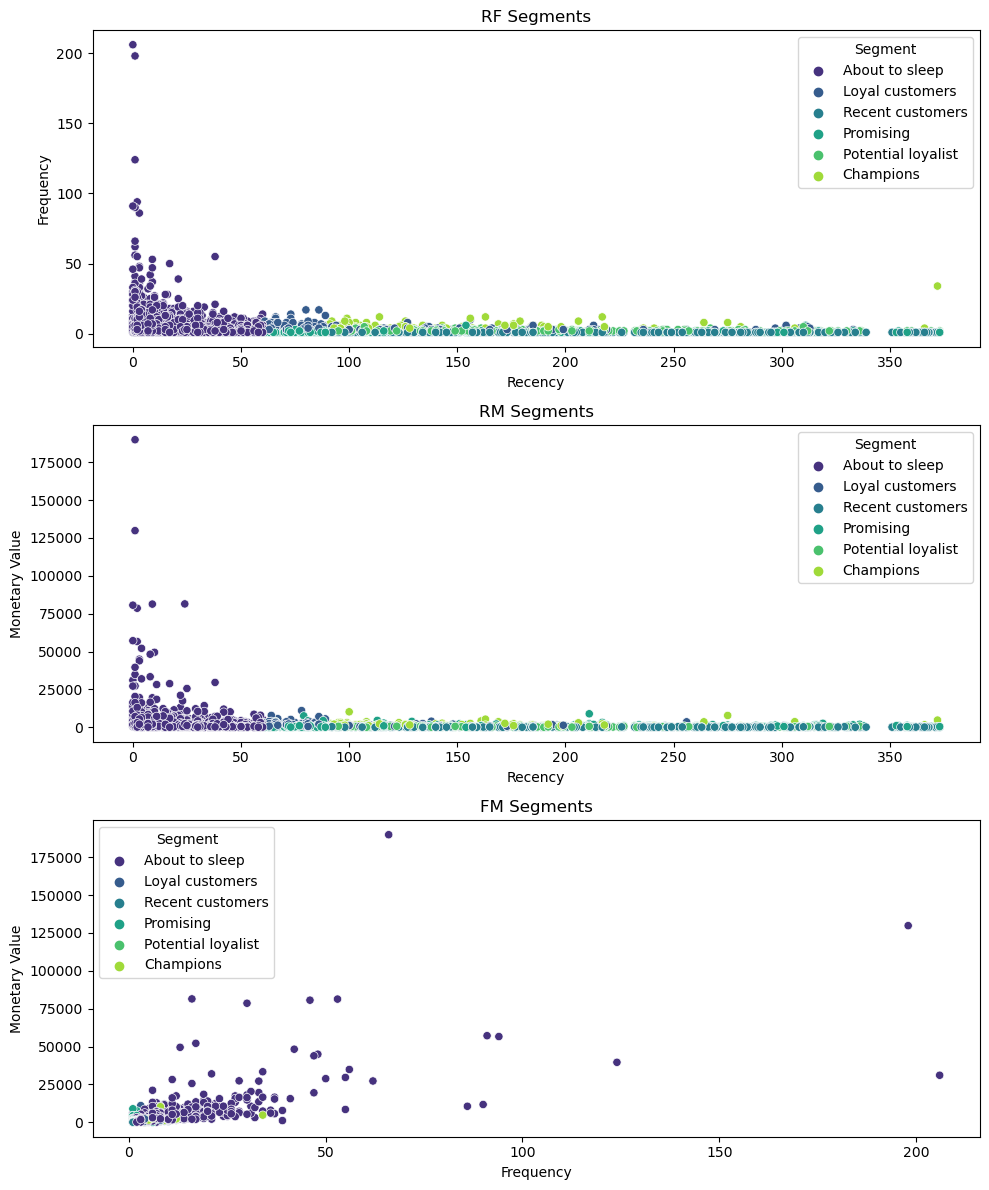

In [96]:
#Visualizing the RFM Segements
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
sns.scatterplot(x='recency', y='frequency', hue='Segment', data=rfm_df, palette='viridis', ax = ax1)
ax1.set_title('RF Segments')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')

sns.scatterplot(x='recency', y='MonetaryValue', hue='Segment', data=rfm_df, palette='viridis', ax=ax2)
ax2.set_title('RM Segments')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Monetary Value')

sns.scatterplot(x='frequency', y='MonetaryValue', hue='Segment', data=rfm_df, palette='viridis', ax=ax3)
ax3.set_title('FM Segments')
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Monetary Value')

plt.tight_layout()
plt.show()

## Conclusion & Strategies:
- <b>About to Sleep:</b>

<b>Conclusion</b>: Low to medium recency, any frequency, and any monetary value.
<b>Strategies</b>: Re-engage with personalized offers, reminding them of your products or services. Implement targeted marketing to bring them back into the active customer base.

- <b>Loyal Customers:</b>

<b>Conclusion </b>: Customers with consistently high recency, frequency, and monetary value.
<b>Strategies</b>: Continue to nurture the relationship with personalized communications. Consider special loyalty rewards or programs to reinforce their loyalty.

- <b>Recent Customers:</b>
    
<b>Conclusion</b>: High recency but lower frequency and monetary value.
<b>Strategies</b>: Focus on converting recent purchases into repeat business. Offer discounts or promotions on complementary products to increase average order value.

- <b>Promising:</b>
    
<b>Conclusion</b> : Moderate to high values in all three dimensions.
<b>Strategies</b>: Engage with personalized marketing to push them towards becoming loyal customers. Provide incentives for more frequent and higher-value purchases.

- <b>Potential Loyalist:
    
<b>Conclusion</b>: Show potential for increased loyalty with moderate recency, frequency, and monetary value.
<b>Strategies</b>: Implement targeted promotions or incentives to encourage higher frequency and spending. Provide personalized recommendations based on their preferences.

- <b>Champions:</b>
    
<b>Conclusion</b>: High recency, frequency, and monetary value suggest these are your most valuable and engaged customers.
<b>Strategies</b>: Offer exclusive rewards, early access, or personalized loyalty programs to maintain their high level of engagement. Encourage them to refer others.

